Notebook to combine and bin data for the NHL from 2014-2019

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
data1 = "nhl odds 2014-15.csv"
data2 = "nhl odds 2015-16.csv"
data3 = "nhl odds 2016-17.csv"
data4 = "nhl odds 2017-18.csv"
data5 = "nhl odds 2018-19.csv"

# Read the mouse data and the study results
data1 = pd.read_csv(data1)
data2 = pd.read_csv(data2)
data3 = pd.read_csv(data3)
data4 = pd.read_csv(data4)
data5 = pd.read_csv(data5)

In [3]:
#put the frames of the different seasons into a list
frames = [data1, data2, data3, data4, data5]

#stack the frames into a single set for analysis
df = pd.concat(frames)

In [12]:
cond1 = df["VH"] == "V"
cond2 = df["VH"] == "H"
away = df[cond1].reset_index()
home = df[cond2].reset_index()
home.head()

,index,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point Dif
0,1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1
1,3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1
2,5,1008,6,H,LosAngeles,0,0,0,0,-121,-150,-1.5,200.0,5.5,-147,5.0,116,-4
3,7,1008,8,H,Calgary,0,2,0,2,111,106,1.5,-275.0,5.5,-143,5.0,120,-2
4,9,1009,52,H,Washington,1,0,0,1,-135,-145,-1.5,205.0,5.5,-115,5.5,-135,-1


In [13]:
home["index"].shape[0]

6670

In [23]:
p_dif = []

for i in range(1, df.shape[0], 2):
        home_dif = df['Final'].iloc[i] - df['Final'].iloc[i-1]
        away_dif = df['Final'].iloc[i-1] - df['Final'].iloc[i]
        p_dif.append(away_dif)
        p_dif.append(home_dif)

        
df['Point Dif'] = p_dif
df.reset_index()

def set_winner(row):
    if row['Point Dif'] > 0:
        return 'Won'
    else:
        return 'Loss'
        
new_df = home.assign(Result=home.apply(set_winner, axis=1)) 
new_df['Result'].value_counts()
win_loss = ['Won','Loss']

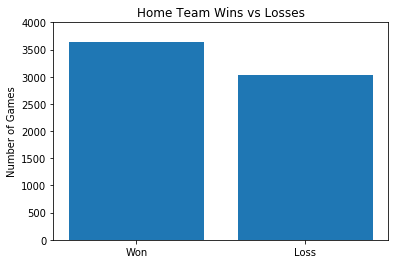

In [24]:
plt.bar(win_loss,new_df['Result'].value_counts())
plt.title("Home Team Wins vs Losses")
plt.ylabel("Number of Games")
plt.ylim(0, 4000)
plt.show()